## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Area of Public Opinion

### "Products and services using AI have more benefits than drawbacks" agree

In [42]:
# TODO (812)

## Area of Research and Development

### Number of AI publications in CS worldwide (2013-2023)

In [29]:
df = pd.read_csv("datasets/research-and-development/data/fig-111.csv")

df.set_index("Year")

,Number of AI publications in CS (in thousands)
Year,
2013,101.885
2014,104.410
2015,105.736
2016,107.266
2017,116.937
2018,139.717
2019,164.202
2020,181.121
2021,204.064


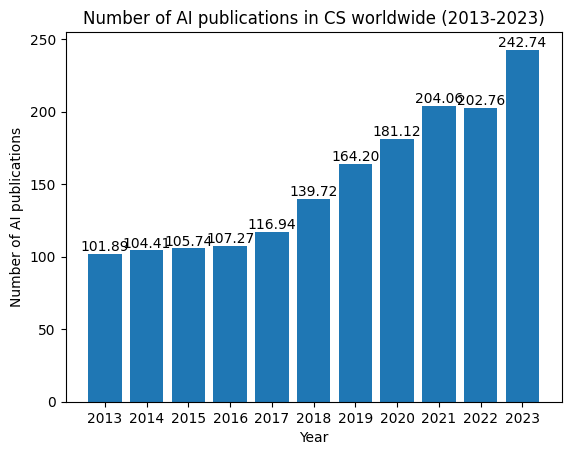

In [40]:
df = df.rename(columns={df.columns[1]: 'Amount'})

plt.bar(df['Year'], df['Amount'])

plt.title("Number of AI publications in CS worldwide (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of AI publications")
plt.xticks([i for i in range(2013, 2024)])

# TODO (111): gestire le etichette, attualmente overlappano
for i in range(len(df['Year'])):
    x = df['Year'][i]
    y = df['Amount'][i]
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom')

plt.show()

### Number of notable AI models by geographic area (2003–2024)

In [41]:
# TODO (133)

### Training compute of select notable AI models in the USA and China (2018-2024)

In [69]:
df = pd.read_csv("datasets/research-and-development/data/fig-1317.csv")
df['Color'] = df.apply(lambda row: 'red' if row['Label'] == 'United States' else 'blue', axis=1)
df

,Publication date,Training compute (petaFLOP – log scale),Label,Color
0,2018-02-01,3.600000e+02,United States,red
1,2018-03-22,2.400000e+02,United States,red
2,2018-05-03,1.270000e+02,United States,red
3,2018-06-01,1.757812e+04,United States,red
4,2018-08-28,4.780800e+05,United States,red
...,...,...,...,...
97,2024-09-19,7.851600e+09,China,blue
98,2024-09-19,7.800000e+09,China,blue
99,2024-10-28,2.505000e+10,China,blue
100,2024-11-06,3.492370e+09,China,blue


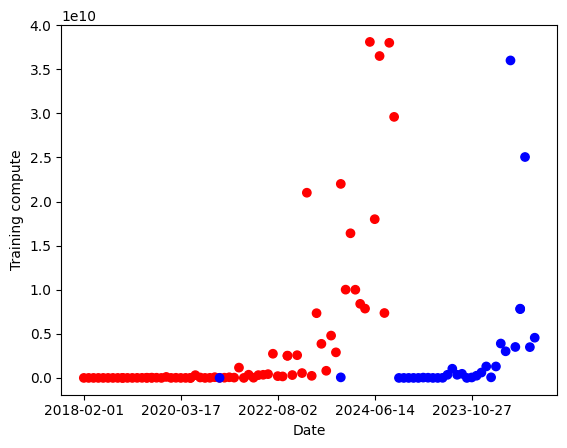

In [67]:
df = df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Amount'})

plt.scatter(df['Date'], df['Amount'], color=df['C'])
plt.xlabel("Date")
plt.ylabel("Training compute")
plt.xticks([i*20 for i in range(5)])
plt.show()

In [71]:
# TODO (1317): sistemare le date e il resto del grafico

## Area of Responsible AI

### Hallucination rate

In [ ]:
# TODO (328)

### Percentage of organizations who experienced AI incidents

In [72]:
# TODO (334)

### Number of AI incidents by organization

In [73]:
# TODO (335)

### AI related types of incidents in the past two years

In [74]:
# TODO (339)

## Area of Scienze and Medicine

### Top 10 ethical concerns discussed in medical AI ethics publications, 2020-2024

In [75]:
# TODO (553)

### Number of AI medical devices approved by the FDA

In [76]:
# TODO (5410)

### LLM performance in clinical diagnosis

In [77]:
# TODO (546)

## Area of Technical Performance

### Performance of top closed/open models

In [78]:
# TODO (2134)

### Smallest models scoring above 60% on MMLU

In [79]:
# TODO (2138)